### RUSSIAN LICENSE PLATE DETECTION AND BLURRING



#### Importing the necessary libraries

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### reading in the image

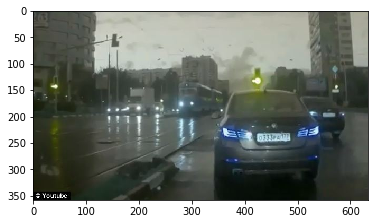

In [2]:
img = cv2.imread('../DATA/car_plate.jpg')
plt.imshow(img)

#### Helper function to color convert and display the image

In [3]:
def display_img(img):
    new_img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,8))
    ax = plt.subplot(111)
    plt.imshow(new_img)

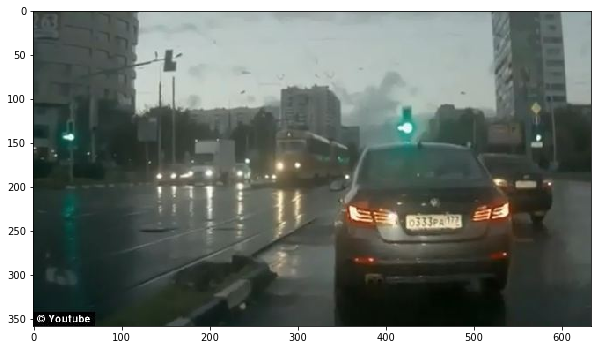

In [4]:
display_img(img)

##### Loading the license plate detector haarcascade

In [5]:
plate_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_russian_plate_number.xml')

In [6]:
type(plate_cascade)

cv2.CascadeClassifier

##### Function to detect the license plate in the image

In [7]:
def detect(img):
    
    copy = img.copy()
    
    plate = plate_cascade.detectMultiScale(copy, scaleFactor = 1.3, minNeighbors=5)
    
    for (x,y,w,h) in plate:
        cv2.rectangle(copy, pt1= (x,y), pt2= (x+w,y+h), color = (0,0,255), thickness = 4)

    return copy

In [8]:
result = detect(img)

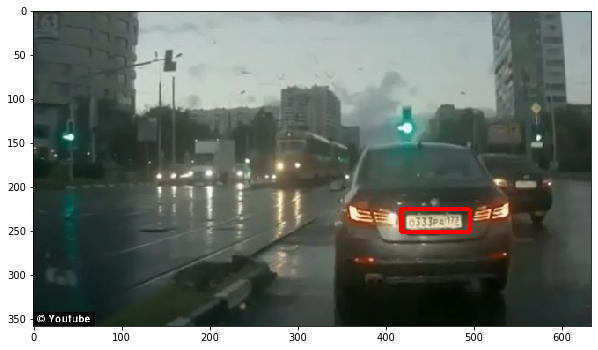

In [9]:
display_img(result)

##### Function to detect the license plate and blur the plate

In [10]:
def detect_and_blur(img):
    
    plate_img = img.copy()
    roi = img.copy()
    
    plate = plate_cascade.detectMultiScale(plate_img, scaleFactor = 1.3, minNeighbors = 3)
    
    for (x,y,w,h) in plate:
        
        roi = roi[y:y+h, x:x+w]
        blurred_roi = cv2.medianBlur(roi, 5)
        
        plate_img[y:y+h, x:x+w] = blurred_roi
        
    return plate_img

In [11]:
blur = detect_and_blur(img)

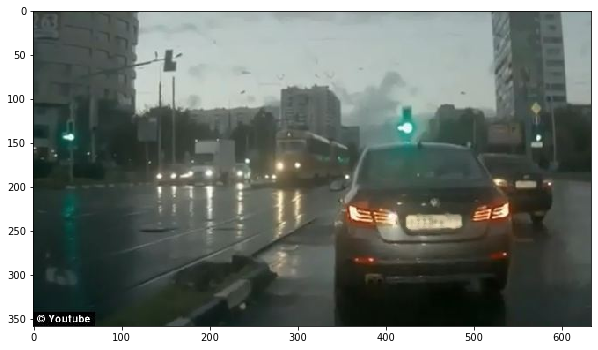

In [12]:
# Displaying the blurred license plate
display_img(blur)

# THE END